# NFL Playing Surface Data Analysis

Analysis of three datasets related to the effects that playing on synthetic turf versus natural turf can have on player movements and the factors that may contribute to lower extremity injuries. 

The data provided for analysis are 250 complete player in-game histories from two subsequent NFL regular seasons. Three different files in .csv format are provided, documenting injuries, player-plays, and player movement during plays:

- Injury Record: The injury record file in .csv format contains information on 105 lower-limb injuries that occurred during regular season games over the two seasons. Injuries can be linked to specific records in a player's history using the PlayerKey, GameID, and PlayKey fields.

- Play List: – The play list file contains the details for the 267,005 player-plays that make up the dataset. Each player is indexed by PlayerKey, GameID, and PlayKey fields. Details about the game and play include the player’s assigned roster position, stadium type, field type, weather, play type, position for the play, and position group.

- Player Track Data: player level data that describes the location, orientation, speed, and direction of each player during a play recorded at 10 Hz (i.e. 10 observations recorded per second).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
injury_df = pd.read_csv('InjuryRecord.csv')

In [3]:
play_list_df = pd.read_csv('Playlist.csv')

In [4]:
player_track_df = pd.read_csv('PlayerTrackData.csv')

In [5]:
injury_df.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [6]:
play_list_df.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [7]:
player_track_df.head(15)

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624-1-1,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12
2,26624-1-1,0.2,NaN,87.44,28.92,280.40,0.01,261.17,0.12
3,26624-1-1,0.3,NaN,87.44,28.92,278.79,0.01,260.66,0.10
4,26624-1-1,0.4,NaN,87.44,28.92,275.44,0.01,260.27,0.09
5,26624-1-1,0.5,NaN,87.45,28.92,270.06,0.01,260.08,0.07
6,26624-1-1,0.6,NaN,87.46,28.92,265.05,0.01,260.05,0.05
7,26624-1-1,0.7,NaN,87.46,28.92,255.75,0.00,260.28,0.02
8,26624-1-1,0.8,NaN,87.46,28.92,244.56,0.00,260.72,0.01
9,26624-1-1,0.9,NaN,87.46,28.92,220.57,0.00,261.26,0.01


# Data Cleaning and Preparation
In this stage the data is checked for accuracy and completeness prior to beginning the analysis. 

- Remove extraneous data
- Check for in missing values
- Replace missing values
- Delete data that cannot be corrected/replaced
- Correct any data formatting issues
- Creating new features
- Identify errors revealed when new variables are created

## Removing Extraneous Data

### Play List

In [8]:
play_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PlayerKey       267005 non-null  int64 
 1   GameID          267005 non-null  object
 2   PlayKey         267005 non-null  object
 3   RosterPosition  267005 non-null  object
 4   PlayerDay       267005 non-null  int64 
 5   PlayerGame      267005 non-null  int64 
 6   StadiumType     250095 non-null  object
 7   FieldType       267005 non-null  object
 8   Temperature     267005 non-null  int64 
 9   Weather         248314 non-null  object
 10  PlayType        266638 non-null  object
 11  PlayerGamePlay  267005 non-null  int64 
 12  Position        267005 non-null  object
 13  PositionGroup   267005 non-null  object
dtypes: int64(5), object(9)
memory usage: 28.5+ MB


There are a significant number of rows in play_list_df. We are concerned primarily with the plays associated with injuries. Therefore, we will identify and delete the irrelevant data.

In [9]:
#Number of unique PlayKeys in Player List
len(pd.unique(play_list_df['PlayKey']))

267005

In [10]:
#Identifying plays in Player List associated with plays in Injury Record
play_list_df.PlayKey.isin(injury_df.PlayKey).value_counts()

False    266929
True         76
Name: PlayKey, dtype: int64

In [11]:
#Identifying plays in Player List associated with plays in Injury Record
play_list_df.GameID.isin(injury_df.PlayKey).value_counts()

False    267005
Name: GameID, dtype: int64

There are only <b>76</b> PlayKeys in the player_track_df that are associated with plays in injury records. Therefore, these are the rows containing data on the plays where the injury occured. 

#### Removing Irrelevant Rows

In [12]:
#Dropping rows where PlayKey is not in Injury Record 
play_list_df.drop(play_list_df[play_list_df.PlayKey.isin(injury_df.PlayKey) == False].index,inplace=True)

### Player Track Data

In [13]:
player_track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76366748 entries, 0 to 76366747
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   PlayKey  object 
 1   time     float64
 2   event    object 
 3   x        float64
 4   y        float64
 5   dir      float64
 6   dis      float64
 7   o        float64
 8   s        float64
dtypes: float64(7), object(2)
memory usage: 5.1+ GB


There are a significant number of rows in player_track_df. We are concerned primarily with the plays associated with injuries. Therefore, we will identify and delete the irrelevant data.

In [14]:
#Number of unique PlayKeys in Player Track Data
len(pd.unique(player_track_df['PlayKey']))

266960

In [15]:
#Identifying plays in Player Track Data associated with plays in Injury Record
player_track_df.PlayKey.isin(injury_df.PlayKey).value_counts()

False    76344843
True        21905
Name: PlayKey, dtype: int64

There are only <b>21905</b> rows in the player_track_df that are associated with plays in the injury record. Therefore, these are the rows containing data on the plays where the injury occured. 

In [16]:
#Dropping rows where PlayKey is not in Injury Record 
player_track_df.drop(player_track_df[player_track_df.PlayKey.isin(injury_df.PlayKey) == False].index,inplace=True)

In [17]:
#Number of unique PlayKeys in Player List
len(pd.unique(player_track_df['PlayKey']))

76

## Checking for missing values

### Injury Record

In [18]:
#Checking for any missing values
injury_df.isnull().values.any()

True

In [19]:
#Identifying which columns contain missing values
injury_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB


There are missing values in the "PlayKey" Column. 

PlayKey uniquely identifies plays made by a specific player during a certain game. Missing values mean that there are injuries recorded that are not associated with a specific play during that player's game. Additionally we will not have information on the play from the Play List and Player Track Data. 

Another thing to note is that there are only 76 unique PlayKeys in the player_track_df and play_list_df that are associated with plays in injury records. Therefore, there is no associated data for the associated rows with missing PLayKeys in injury_df. 

Therefore, it would be best to drop these rows that do not contain associated values in the other two Dataframe.  

#### Deleting Rows Associated with the Missing Values

In [20]:
#Dropping rows with missing values
injury_df.dropna(inplace=True)

In [21]:
#Checking if any missing values remain
injury_df.isnull().values.any()

False

### Play List

In [22]:
#Checking for any missing values
play_list_df.isnull().values.any()

True

In [23]:
play_list_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 7261 to 266263
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PlayerKey       76 non-null     int64 
 1   GameID          76 non-null     object
 2   PlayKey         76 non-null     object
 3   RosterPosition  76 non-null     object
 4   PlayerDay       76 non-null     int64 
 5   PlayerGame      76 non-null     int64 
 6   StadiumType     72 non-null     object
 7   FieldType       76 non-null     object
 8   Temperature     76 non-null     int64 
 9   Weather         73 non-null     object
 10  PlayType        76 non-null     object
 11  PlayerGamePlay  76 non-null     int64 
 12  Position        76 non-null     object
 13  PositionGroup   76 non-null     object
dtypes: int64(5), object(9)
memory usage: 8.9+ KB


The "StadiumType" and "Weather" have missing values.
- For missing stadium type values,we will assume the stadium type is either unknown or does not fit into the preset categories (For example, partially Indoors) and represent the value as "Unknown."
- For missing weather values, we will assume the game occured in either closed dome/indoor stadium or the weather conditions are not known and represent the value as "Not Applicable."

#### Replacing the Missing Values

In [24]:
play_list_df['StadiumType'] = play_list_df['StadiumType'].fillna("Unknown")
play_list_df['Weather'] = play_list_df['Weather'].fillna("Not Applicable")

In [25]:
#Checking if any missing values remain
play_list_df.isnull().values.any()

False

### Player Track Data

In [26]:
#Checking for any missing values
player_track_df.isnull().values.any()

True

In [27]:
#Identifying which columns contain missing values
player_track_df.isnull().value_counts()

PlayKey  time   event  x      y      dir    dis    o      s    
False    False  True   False  False  False  False  False  False    21415
                False  False  False  False  False  False  False      490
dtype: int64

We see that the "event" column has missing values.

The event refers to the play details as a function of time during the play. For each play, each subsequent value in this column is a moment in time during the play. Therefore, it is possible the name of the event only appears on the first instant of the play (time = 0.0) and remains blank in the subsequent rows associated with the same event. Nevertheless, we will be dropping the column as it mainly contains categorical data and we will still have all the numeric data available for analysis.

#### Dropping Missing Values

In [28]:
#Dropping the "event" column
player_track_df.drop('event', inplace=True, axis=1)

In [29]:
#Checking if any missing values remain
player_track_df.isnull().values.any()

False

## Correct Formatting Issues
### Play List
#### Stadium Type

In [30]:
play_list_df['StadiumType'].value_counts()

Outdoor                38
Outdoors                8
Indoor                  7
Unknown                 4
Indoors                 3
Retractable Roof        3
Dome                    2
Outddors                2
Closed Dome             1
Retr. Roof-Closed       1
Open                    1
Indoor, Roof Closed     1
Retr. Roof - Closed     1
Retr. Roof - Open       1
Indoor, Open Roof       1
Oudoor                  1
Domed, closed           1
Name: StadiumType, dtype: int64

Generally , we are only concerned if the Stadium is indoor or outdoor to understand its exposure to the elements.

The inconsistencies in the stadium types will all be attributed as follows:
- Outdoor: Outdoors; Oudoor,Outddors; Retr. Roof - Open; Open; Retr. Roof - Open; Indoor, Roof Closed  
- Indoor: Indoors; Retr. Roof-Closed; Retr. Roof - Closed; Roof Closed; Dome; Domed, closed; Closed Dome; Indoor, Roof Closed   

The following are in and Unknown State so we will classify them all as Unknown
- Unknown: Retractable Roof, Indoor, Open Roof


In [31]:
#Replacing the values
play_list_df['StadiumType'].replace('Outdoors','Outdoor', inplace=True)
play_list_df['StadiumType'].replace('Oudoor','Outdoor', inplace=True)
play_list_df['StadiumType'].replace('Outddors','Outdoor', inplace=True)
play_list_df['StadiumType'].replace('Retr. Roof - Open','Outdoor', inplace=True)
play_list_df['StadiumType'].replace('Open','Outdoor', inplace=True)

play_list_df['StadiumType'].replace('Indoors','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Retr. Roof-Closed','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Retr. Roof - Closed','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Roof Closed','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Indoor, Roof Closed','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Dome','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Domed, closed','Indoor', inplace=True)
play_list_df['StadiumType'].replace('Closed Dome','Indoor', inplace=True)

play_list_df['StadiumType'].replace('Retractable Roof','Unknown', inplace=True)
play_list_df['StadiumType'].replace('Indoor, Open Roof','Unknown', inplace=True)

#### Weather

In [32]:
play_list_df['Weather'].value_counts()

Cloudy                                                                              13
Sunny                                                                               11
Partly Cloudy                                                                       11
Clear                                                                                7
Indoor                                                                               5
Rain                                                                                 4
Cold                                                                                 3
Not Applicable                                                                       3
Indoors                                                                              2
Cloudy, 50% change of rain                                                           2
Clear skies                                                                          2
Sun & clouds                               

Generally, we are only concerned about bad weather conditions affecting players such as rain. However, the weather classification appears to be subjective. It may be possible to classify Weather as Hot or Cold based on temperature value but it is not possible to accurately classify if its rainy, cloud etc. given temperature data alone.

Best course of action will be to avoid analyzing data based on 'Weather' in the subsequent analysis. As seen above there are clearly some issues with how the temperature data has been classified under weather. It may be possible to classify Weather as Hot or Cold based on temperature value but it is not possible to accurately classify if it's rainy, cloud etc. given this data.

In [33]:
#Dropping the weather column
play_list_df.drop(columns=['Weather'],inplace=True)

#### Temperature

In [34]:
play_list_df['Temperature'].mean()

-32.69736842105263

In [35]:
play_list_df['Temperature'].sort_values()

190084   -999
171123   -999
264404   -999
162455   -999
238810   -999
         ... 
167125     89
102209     89
165185     89
251397     89
7261       89
Name: Temperature, Length: 76, dtype: int64

The temperature values of -999 are clearly wrong. As we see there are some erroneous values so we will replace them with the average of the remaining values. 

In [36]:
temp_df = play_list_df['Temperature']
temp_df = temp_df.to_frame()
temp_df.drop(temp_df[temp_df['Temperature']==-999].index, inplace=True)
avg_temp = round(temp_df['Temperature'].mean())

In [37]:
play_list_df['Temperature'].replace(-999,avg_temp ,inplace=True)

In [38]:
play_list_df['Temperature'].mean()

65.30263157894737

# Exploratory Data Analysis (EDA)

In this stage, we will examine the data to identify any patterns, trends and relationships between the variables. It will help us analyze the data and extract insights that can be used to make decisions.

Data Visualization will give us a clear idea of what the data means by giving it visual context.

## Injury Records

### Surface

Text(0.5, 1.0, 'Number of Injury Occurances by Surface')

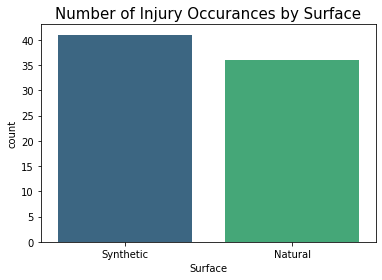

In [39]:
surface_count = injury_df['Surface']
sns.countplot(x=surface_count,palette='viridis')
plt.title("Number of Injury Occurances by Surface", fontsize=15)

In [40]:
synthetic = injury_df['Surface'].value_counts()[0]
natural = injury_df['Surface'].value_counts()[1]

round(((synthetic-natural)/natural)*100,2)

13.89

Synthetic surfaces result in <b>13.89%</b> more injuries than Natural surfaces. 

### Body Part Injured

Text(0.5, 1.0, 'Number of Injury Occurances by Body Part')

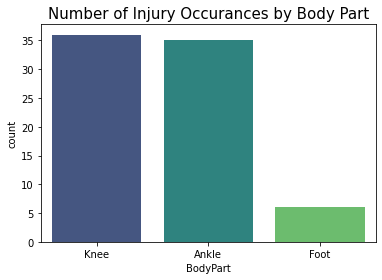

In [41]:
bodypart_count = injury_df['BodyPart']
sns.countplot(x=bodypart_count,palette='viridis')
plt.title("Number of Injury Occurances by Body Part", fontsize=15)

<b>Knee</b> and <b>Ankle</b> injuries have the highest occurrances.

### Days Missed Due to Injury

A typical NFL season is 18-weeks or 126 days. Each team plays 17 games with one week off. Therefore, A player would play in one game a week. The number of days missed can be considered the duration of the injury as it affects the players ability to participate in games during the season.

- Injuries lasting 1 days or more can be considered <i>short duration</i>, as the player would miss 1 game or approx. 6% of the season the worst case. 
- Injuries lasting 7 days or more can be considered <i>medium duration</i>, as the player would miss 4 games or approx. 24% of the season in the worst case. 
- Injuries lasting 28 days or more can be considered <i>long duration</i>, as the player would miss 6 games or approx. 35% of the season in the worst case. 
- Injuries lasting 42 days or more can be considered <i>indefinite duration</i>, as the number of games the player would miss would depend on the nature of the injury and whether it would be safe for them to immediately go back to the field. It is entirely possible that the player may have to sit out the rest of the season so injuries in this category are of the greatest concern to players.

Text(0.5, 1.0, 'Number of Days Missed Due to Injury')

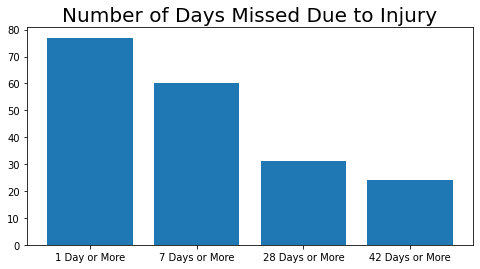

In [42]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#Counting Number of Days missed due to injury
day_1 = injury_df['DM_M1'].value_counts()[1]
days_7 = injury_df['DM_M7'].value_counts()[1]
days_28 = injury_df['DM_M28'].value_counts()[1]
days_42 = injury_df['DM_M42'].value_counts()[1]

#Creating a list with the values
days_missed = [day_1,days_7,days_28,days_42]
days_missed_label = ['1 Day or More','7 Days or More','28 Days or More','42 Days or More']

plt.bar(days_missed_label,days_missed)
plt.title("Number of Days Missed Due to Injury", fontsize=20)

The majority of injuries result in players missing either <b>1 or more days or 7 days or more.</b> 

#### Days Missed Due to Injury vs Surface

In [43]:
#Grouping by Surface
days_missed_surface = injury_df.groupby('Surface').agg(day_1=('DM_M1',np.count_nonzero),days_7=('DM_M7',np.count_nonzero),days_28=('DM_M28',np.count_nonzero),days_42=('DM_M42',np.count_nonzero))
days_missed_surface  

,day_1,days_7,days_28,days_42
Surface,,,,
Natural,36,27,11,9
Synthetic,41,33,20,15


The data above has overlap in the values counted as the counts are not mutually exclusive. 

It would be useful to know what percent of players injured on each surface correspond to each injury duration i.e. the days missed. We can modify the days_missed DataFrame to help us visualize this relationship.

In [44]:
#Creating new columns with mutually exclusive values
days_missed_surface ['day_1_new'] = days_missed_surface ['day_1'] - days_missed_surface ['days_7']
days_missed_surface ['days_7_new'] = days_missed_surface ['days_7'] - days_missed_surface ['days_28']
days_missed_surface ['days_28_new'] = days_missed_surface ['days_28'] - days_missed_surface ['days_42']
days_missed_surface ['days_42_new'] = days_missed_surface ['days_42']

#Deleting the original columns
days_missed_surface .drop(['day_1','days_7','days_28','days_42'], inplace=True, axis=1)

#Renaming new columns
days_missed_surface.rename(columns={'day_1_new': '1 Day or More', 'days_7_new': '7 Days or More', 'days_28_new': '28 Days or More', 'days_42_new': '42 Days or More'}, inplace=True)

Text(0.5, 1.0, 'Days Missed Due to Injury vs Surface')

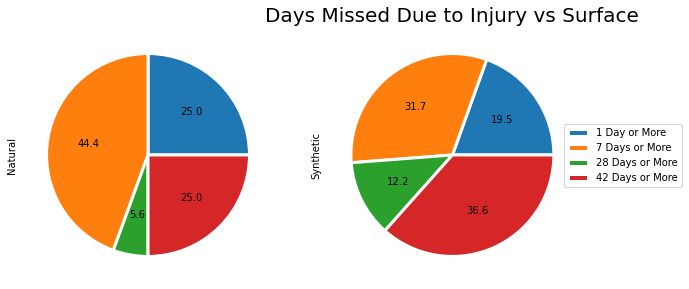

In [45]:
#Plotting the pie chart for each row
days_missed_surface.T.plot.pie(subplots=True, figsize=(10, 5), autopct="%.1f", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, labels=None,legend=False)
plt.legend(labels=days_missed_surface.columns, bbox_to_anchor=(1.05,0.5), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)

#days_missed.T allows us to transpose the DataFrame and plot each row as a pie chart
# autopct="%.1f" shows the percentage to 1 decimal place 
#wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'} creates a space between pie segments
#bbox_to_anchor allows us to manually place the legend
#bbox_transform=plt.gcf().transFigure ensures that the legend does not overlap with the pie charts

plt.title("Days Missed Due to Injury vs Surface", fontsize=20)

Based on this visualization we can say that,
- Players have a relatively higher likelihood of suffering short and medium duration injuries on Natural surfaces.
- Players have a relatively higher likelihood of suffering long and indefinite duration injuries on Synthetic surfaces. 

Overall, injuries on synthetic surfaces result in players missing more days than those on natural surfaces. 

## Play List

### Roster Position

Text(0.5, 1.0, 'Number of Injury Occurances by Roster Postion')

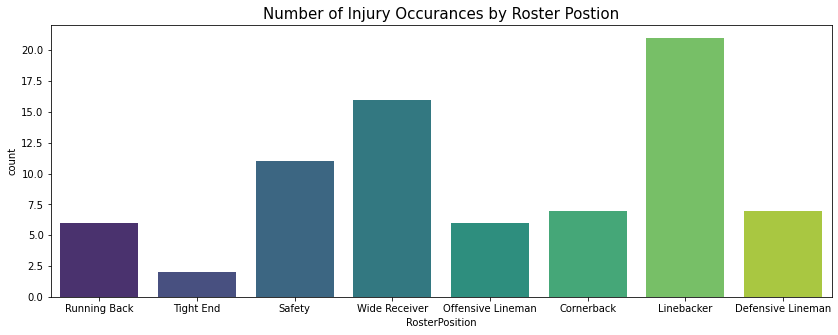

In [46]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

roster_position_count = play_list_df['RosterPosition']
sns.countplot(x=roster_position_count,palette='viridis')
plt.title("Number of Injury Occurances by Roster Postion", fontsize=15)

The most injuries are sustained by Players in the <b>Linebacker</b> position followed by those in the <b>Wide Receiver</b> and <b>Safety</b> positions.

### Stadium Type

Text(0.5, 1.0, 'Number of Injury Occurances by Stadium Type')

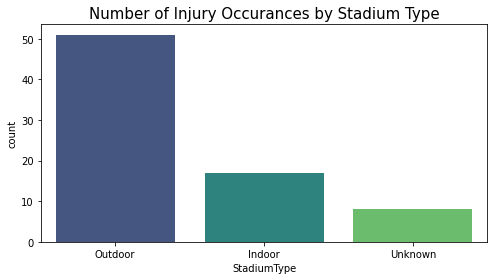

In [47]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

stadium_type_count = play_list_df['StadiumType']
sns.countplot(x=stadium_type_count,palette='viridis')
plt.title("Number of Injury Occurances by Stadium Type", fontsize=15)

The most injuries occur in <b>Outdoor</b> Stadiums, which makes sense as these stadiums have the most exposure to potentially hazardous weather conditions.

### Temperature

Text(0.5, 1.0, 'Number of Injury Occurances by Temperature')

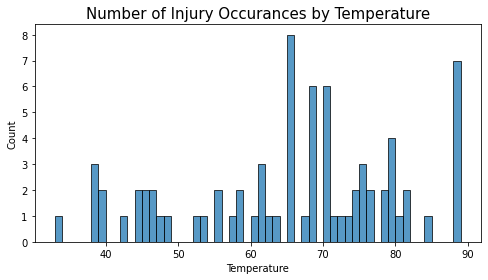

In [48]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

temp = play_list_df['Temperature']
sns.histplot(x=temp,binwidth=1)
plt.title("Number of Injury Occurances by Temperature", fontsize=15)

The greatest number of injuries take place in games with weather of <b>67-68 degrees</b> followed by <b>88-89 degrees.</b>

### Position

Text(0.5, 1.0, 'Number of Injury Occurances by Postion')

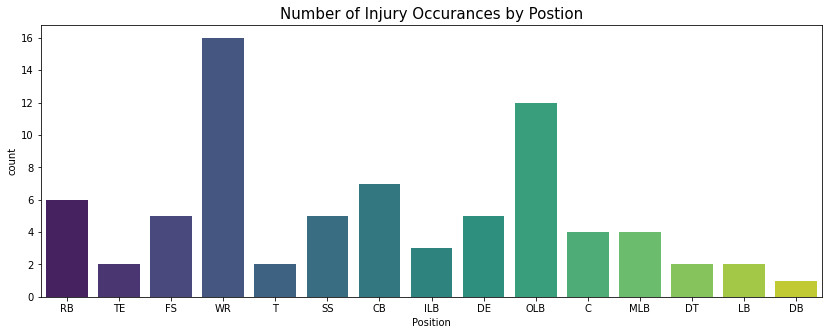

In [49]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

position_count = play_list_df['Position']
sns.countplot(x=position_count,palette='viridis')
plt.title("Number of Injury Occurances by Postion", fontsize=15)

The most injuries are sustained by players in the <b>Wide Receiver (WR)</b> position during a play followed by those in the <b>Outside Linebacker (OLB)</b> position.

### Position Group

Text(0.5, 1.0, 'Number of Injury Occurances by Postion Group')

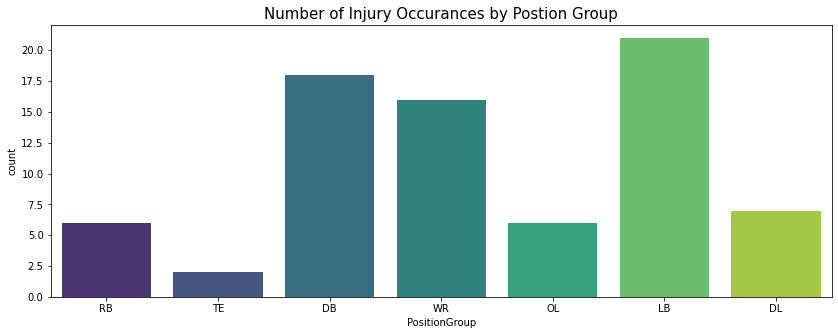

In [50]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

position_group_count = play_list_df['PositionGroup']
sns.countplot(x=position_group_count,palette='viridis')
plt.title("Number of Injury Occurances by Postion Group", fontsize=15)

The most injuries are sustained by players in the <b> Linebacker (LB)</b> position group during a play followed by those in the <b>Wide Receiver (WR) and Defensive Back (DB)</b> position group.

### Field Type/Surface

Text(0.5, 1.0, 'Number of Injury Occurances by Field Type')

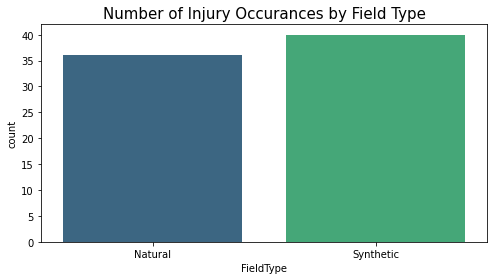

In [51]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

field_type_count = play_list_df['FieldType']
sns.countplot(x=field_type_count,palette='viridis')
plt.title("Number of Injury Occurances by Field Type", fontsize=15)

There are more injuries on <b>Synthetic</b> fields.

#### Field Type/Surface vs. Roster Position

Text(0.5, 1.0, 'Number of Injury Occurances by Roster Postion')

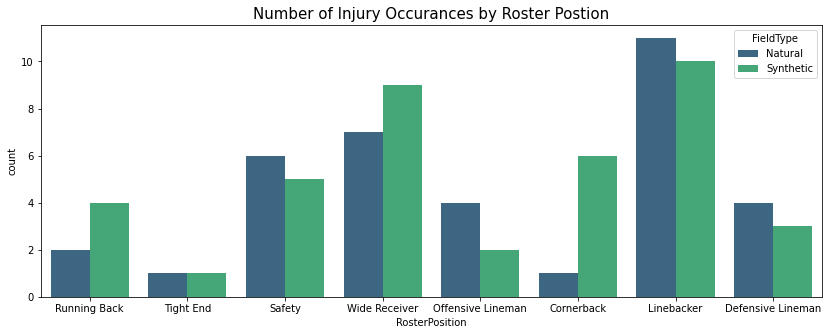

In [52]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

roster_position_count = play_list_df['RosterPosition']
sns.countplot(x=roster_position_count, data=play_list_df,palette='viridis',hue='FieldType')
plt.title("Number of Injury Occurances by Roster Postion", fontsize=15)

Natural surfaces result in more injuries for players in the Linebacker, Safety, Defensive Lineman and Offensive Lineman roster positions.

Synthetic surfaces in more injuries for players in the Wide Receiver, Cornerback and Running Back roster positions

<u>Note:</u> The Roster Position refers to the official position assigned to the player but it may vary in the actual play itself. The Position refers to the player's position during the actual play so this information must be verified with the Position data.

#### Field Type/Surface vs. Position

Text(0.5, 1.0, 'Number of Injury Occurances by Postion')

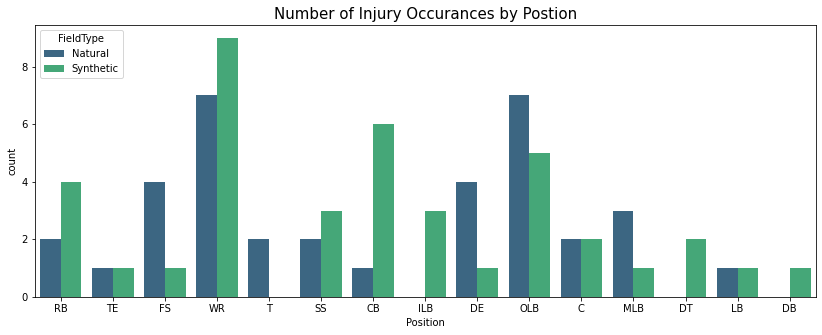

In [53]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

position_count = play_list_df['Position']
sns.countplot(x=position_count,data=play_list_df,palette='viridis',hue='FieldType')
plt.title("Number of Injury Occurances by Postion", fontsize=15)

Players in the Wide Receivers (WR) position, who sustain the most injuries during a play, sustain <b>more injuries on Synthetic surfaces than Natural ones.</b>
- Players in 7 out of 15 positions sustain more injuries on Synthetic Surfaces.
- Players in 5 out of 15 positions sustain more injuries on Natural Surfaces.
- Players in 3 out of 15 positions sustain about the same injuries on both surfaces.

#### Field Type/Surface vs. Position Group

Text(0.5, 1.0, 'Number of Injury Occurances by Postion Group')

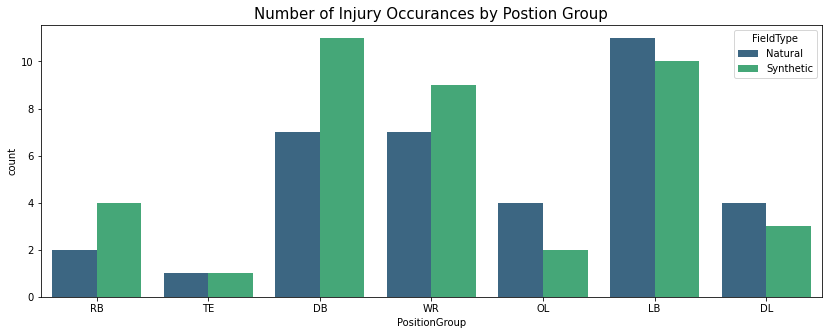

In [54]:
fig_dims = (14, 5)
fig, ax = plt.subplots(figsize=fig_dims)

position_group_count = play_list_df['PositionGroup']
sns.countplot(x=position_group_count, data=play_list_df,palette='viridis',hue='FieldType')
plt.title("Number of Injury Occurances by Postion Group", fontsize=15)

Players in the Linebacker (LB) position group, who sustain the most injuries during a play, sustain <b>more injuries on Natural surfaces than Synthetic ones.</b>
- Players in 3 out of 7 position groups sustain more injuries on Synthetic Surfaces.
- Players in 3 out of 7 position groups sustain more injuries on Natural Surfaces.
- Players in 1 out of 7 position groups sustain about the same injuries on both surfaces.

#### Field Type/Surface vs. Stadium Type

Text(0.5, 1.0, 'Number of Injury Occurances by Stadium Type')

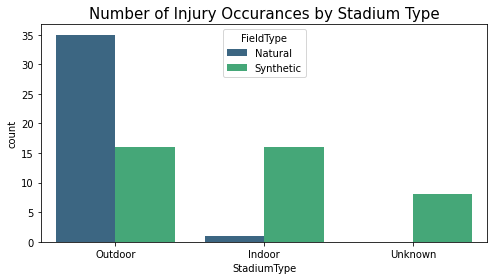

In [55]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)

stadium_type_count = play_list_df['StadiumType']
sns.countplot(x=stadium_type_count, data=play_list_df,palette='viridis',hue='FieldType')
plt.title("Number of Injury Occurances by Stadium Type", fontsize=15)

- Injuries sustained in outdoor stadiums are primarily because of Natural Surfaces.
- Injuries sustained in indoor stadiums are primarily because of Synthetic Surfaces.

#### Field Type/Surface vs. Temperature

Text(0.5, 0.98, 'Number of Injury Occurances by Temperature')

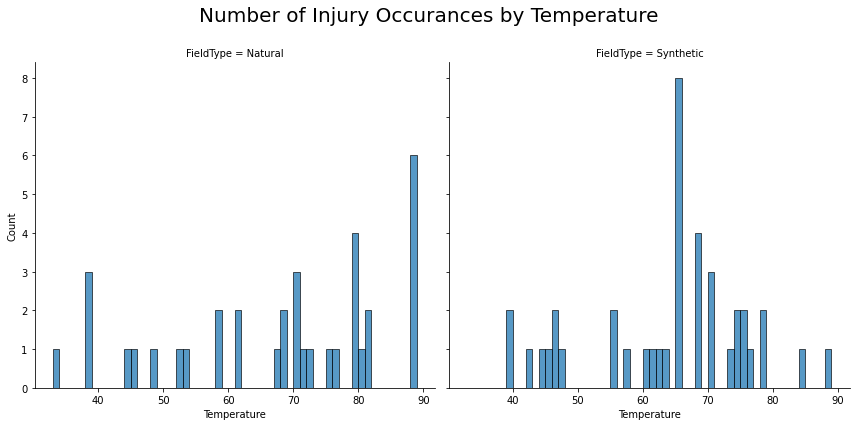

In [56]:
graph = sns.FacetGrid(play_list_df, col="FieldType", height=6)
graph.map_dataframe(sns.histplot,x="Temperature",binwidth=1)

#Setting the title for the FacetGrid 
graph.fig.subplots_adjust(top=0.85)
graph.fig.suptitle('Number of Injury Occurances by Temperature', fontsize=20)

- There is a rise in injuries on Synthetic surfaces between 67-71 degrees, with the most injuries occurring between 67-68 degrees.
- Injuries spike at a few different temperatures for Natural surfaces, with the most injuries occurring between 88-89 degrees.

## Player Track Data 
### Identifying Potential Instances of Injury

The player_track_df DataFrame gives us the most information about how the player's body is moving during a play. 

<i>"Injuries occur during football games and practice due to the combination of high speeds and full contact. While overuse injuries can occur, traumatic injuries such as concussions are most common. The force applied to either bringing an opponent to the ground or resisting being brought to the ground makes football players prone to injury anywhere on their bodies, regardless of protective equipment."</i> - Football Injuries, University of Rochester Medical Center 

Source: “Football Injuries.” UR Medicine, University of Rochester Medical Center, University of Rochester Medical Center, 2010, www.urmc.rochester.edu/orthopaedics/sports-medicine/football-injuries.cfm. 

Given the context above, it might be possible to identify the moment of injury by tracking the instant when the maximum change occurs in all the variables associated with movement. 

We will create a new DataFrame with variables that reflect the player's motion during the play. 

- delta_dir: Change in angle of player motion
- delta_o: Change in player orientation
- delta_s: Change in player speed

Note: 
- x and y capture the location of the player on the field and they are not as important in identifying when the injury occured.
- dis captures the distance travelled and s captures the speed which is the distance travelled over the time difference so there is no need to include both variables. 

In [57]:
# Creating a new DataFrame to the change in variables
delta_player_track_df = player_track_df['PlayKey'].to_frame()

delta_player_track_df['time'] = player_track_df['time']

#Adding new columns to reflect the absolute change in variables using DataFrame.diff()
#np.where ensures that in case the time is 0.0 the difference is not calculated as this indicates the row is associated with the next PlayKey. In that case the value will be set to 0
#np.where(condition,value if condition is true, value if condition is false)

delta_player_track_df['delta_dir'] = np.where(player_track_df['time'] == 0, 0, abs(player_track_df['dir'].diff()))
delta_player_track_df['delta_o'] = np.where(player_track_df['time'] == 0, 0, abs(player_track_df['o'].diff()))
delta_player_track_df['delta_s'] = np.where(player_track_df['time'] == 0, 0, abs(player_track_df['s'].diff()))     

In [58]:
#Checking number of rows
delta_player_track_df.shape[0]

21905

Now that we have a DataFrame containing all the necessary variables, we can determine which values are outside the norm for each one of these variables. 

We are assuming that the injury is sustained as a result of impact, which would be reflected as a sudden change in players normal motion. We will assume any instance where the player's movements are above average across any of these variables indicates a <b>high risk instance</b> where the injury could have occured.  

If we assume the data has a gaussian distribution (as the majority of the player's motion does not result in injury), we can calculate the z score for each variable to determine which values are outliers. 

- A z-score tells us how many standard deviations away a value is from the mean. 
- Outliers will be values that are more than 3 standard deviations away from the average.
- The outliers will be potential instances where the player may have sustained the injury.

In [59]:
#Calculating z-scores for dataset as a whole
from scipy import stats
from scipy.stats import zscore

z_score_dir = stats.zscore(delta_player_track_df['delta_dir'])
z_score_o = stats.zscore(delta_player_track_df['delta_o'])
z_score_s = stats.zscore(delta_player_track_df['delta_s'])

## Distribution of Data
### Change in Angle of Player Motion

Text(0.5, 1.0, 'Change in Angle of Player Motion vs. Time')

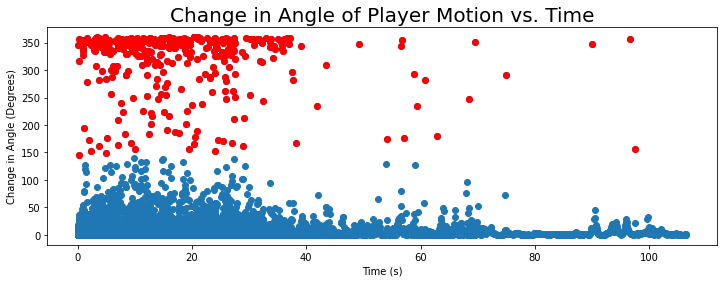

In [60]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

highlight = delta_player_track_df[z_score_dir>3]

ax.scatter(y='delta_dir',x='time', data=delta_player_track_df)
ax.scatter(y='delta_dir',x='time', data=highlight,facecolor="red")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Change in Angle (Degrees)")
ax.set_title("Change in Angle of Player Motion vs. Time",fontsize=20)

<b>Highlighted points have a z-score > 3</b>

The majority of plays seem to require some type of instantaneous change in the player's direction of motion in the first 40 seconds of the game. 
- This could be attributed to execution of plays which requires rapid movement and coordination with other players.
- It also suggests that the risk of injury is the greatest in the first 40 seconds of the game. 

### Change in Player Orientation

Text(0.5, 1.0, 'Change in Player Orientation vs. Time')

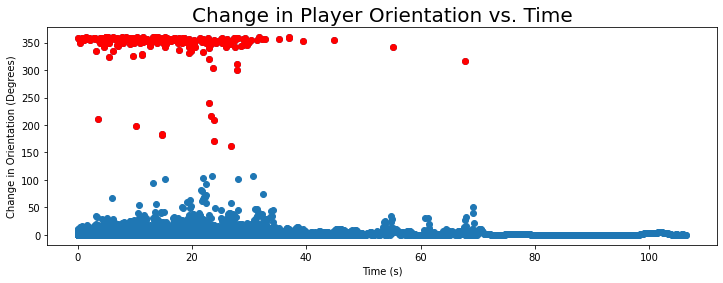

In [61]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

highlight = delta_player_track_df[z_score_o>3]

ax.scatter(y='delta_o',x='time', data=delta_player_track_df)
ax.scatter(y='delta_o',x='time', data=highlight,facecolor="red")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Change in Orientation (Degrees)")
ax.set_title("Change in Player Orientation vs. Time",fontsize=20)

<b>Highlighted points have a z-score > 3</b>

Correlating with the Change in Angle, the majority of plays seem to require some type of instantaneous change in the direction the player is facing in the first 40 seconds of the game. 
- The correlation makes sense as the player would orient themselves in a certain direction and begin/change angle of motion simultaneously during a play.  
- Again, it also suggests that the risk of injury is the greatest in the first 40 seconds of the game. 

### Change in Player Speed

Text(0.5, 1.0, 'Change in Player Speed vs. Time')

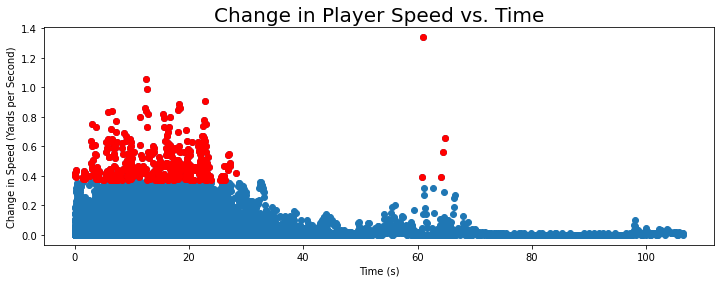

In [62]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

highlight = delta_player_track_df[z_score_s>3]

ax.scatter(y='delta_s',x='time', data=delta_player_track_df)
ax.scatter(y='delta_s',x='time', data=highlight,facecolor="red")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Change in Speed (Yards per Second)")
ax.set_title("Change in Player Speed vs. Time",fontsize=20)

<b>Highlighted points have a z-score > 3</b>

Generally the change in speed values are clustered closer together, indicating that the variation in speed is somewhat lower for most of these plays. 
- Rapid changes in speed are associated with potential instances of injury, which makes sense as these could indicate impact

### Key Takeaways from Visualizing Distributions
None of the variables follow a gaussian distribution, however, the variables do seem to cluster below certain values. which can be helpful in visually identifying outliers. 

Identifying points with a z-score > 3 does a somewhat decent job of identifying outliers so we will proceed with this method. However, we will calculate the z-scores for the variables for each PlayKey instead of the data as whole to improve the accuracy a bit. 

## Identifying High Risk Potential Instances of Injury


In [63]:
#Creating a DataFrame to store all the high risk instances
high_risk_playkey = pd.DataFrame(columns = ['PlayKey','time','delta_dir','delta_o','delta_s'])

#Creating a groupby object so we can retrive the keys which in this case are the PlayKeys
groups = delta_player_track_df.groupby('PlayKey')

# extract keys from groups
keys = groups.groups.keys()

#Creating a for loop that will calculate the z-scores for each individual PlayKey and check if any of the values are more than three standard deviations away
for i in keys: 
    #Creating a Dataframe with the desired rows for each Playkey
    i_df = delta_player_track_df[delta_player_track_df['PlayKey']==i]
    
    #Calculate z-scores for this PlayKey
    z_score_dir = stats.zscore(i_df['delta_dir'])
    z_score_o = stats.zscore(i_df['delta_o'])
    z_score_s = stats.zscore(i_df['delta_s'])
    
    #Filter by z-scores exceeding 3
    i_df = i_df[(z_score_dir>3) | (z_score_o>3) | (z_score_s>3)]
    
    #Attaching the DataFrame to the high_risk_playkey DataFrame 
    high_risk_playkey = pd.concat([high_risk_playkey, i_df], axis=0)

In [64]:
high_risk_playkey.shape[0]

1192

In [65]:
#Checking if the DataFrame contains all the PlayKey values
len(pd.unique(high_risk_playkey['PlayKey']))

76

We now have a DataFrame with all the high risk instances for all PlayKey values. Although there are still a significant number of instances for each PlayKey we have narrowed down the values from our original data. 

This allows us to answer the following questions:

- On average, when does a potential instance of injury occur during a play for each type of surface?
- How many potential instances of injury occur during a play for each type of surface?

Note:
- One or more instances in each play could represent when the injury occured (Example, multiple tackles resulting in a knee injury.). 
- The other instances could be a result of regular in-game moves that require instantaneous movement.

In [66]:
#Creating a new DataFrame with the PlayKeys and associated surface/field type
surfaces = play_list_df[['PlayKey','FieldType']]
#Merging the two DataFrames to add the surface/field type values
high_risk_playkey = pd.merge(left=high_risk_playkey, right=surfaces, left_on='PlayKey', right_on='PlayKey')

In [67]:
surface_risk = high_risk_playkey.groupby('FieldType').agg(number_of_instances=('FieldType',pd.Series.value_counts),min_time=('time',np.min),max_time=('time',np.max),avg_time=('time',np.mean))
surface_risk.round(1)

,number_of_instances,min_time,max_time,avg_time
FieldType,,,,
Natural,545,0.1,37.1,16.0
Synthetic,647,0.1,97.6,17.1


- There are 18.72% more instances of potential injury during plays on Synthetic surfaces as opposed to Natural surfaces.
- The average time for a potential instance of injury to occur is slightly lower on natural surfaces as opposed to Synthetic.

# Summary of Data Analysis

Overall, Synthetic surfaces result in <b>13.89%</b> more injuries than Natural surfaces
- Knee and Ankle injuries have the highest occurrences.
- The majority of injuries result in players missing between 1 day or more or 7 days or more.

### Days Missed
Injuries on synthetic surfaces result in players missing more days than those on natural surfaces. 
- Players have a relatively higher likelihood of suffering medium duration injuries on Natural surfaces.
- Players have a relatively higher likelihood of suffering short, long and indefinite duration injuries on Synthetic surfaces. 


### Roster Position
- Natural surfaces result in more injuries for players in the Linebacker, Safety, Defensive Lineman and Offensive Lineman roster positions.
- Synthetic surfaces in more injuries for players in the Wide Receiver, Cornerback and Running Back roster positions

<u>Note:</u> The Roster Position refers to the official position assigned to the player but it may vary in the actual play itself. The Position refers to the player's position during the actual play so this information must be verified with the Position data.

### Position
Players in the Linebacker (LB) position group, who sustain the most injuries during a play, sustain <b>more injuries on Natural surfaces than Synthetic ones.</b>
- Players in 3 out of 7 position groups sustain more injuries on Synthetic Surfaces.
- Players in 3 out of 7 position groups sustain more injuries on Natural Surfaces.
- Players in 1 out of 7 position groups sustain about the same injuries on both surfaces.

### Position Group
Players in the Linebacker (LB) position group, who sustain the most injuries during a play, sustain <b>more injuries on Natural surfaces than Synthetic ones.</b>
- Players in 3 out of 7 position groups sustain more injuries on Synthetic Surfaces.
- Players in 3 out of 7 position groups sustain more injuries on Natural Surfaces.
- Players in 1 out of 7 position groups sustain about the same injuries on both surfaces.

### Stadium Type
- Injuries sustained in outdoor stadiums are primarily because of Natural Surfaces.
- Injuries sustained in indoor stadiums are primarily because of Synthetic Surfaces.

## Identifying Potential Instances of Injury

We are assuming that the injury is sustained as a result of impact, which would be reflected as a sudden change in players normal motion. We will assume any instance where the player's movements are out of the ordinary across the variables in the Player Track Data indicates a <b>high risk instance</b> where the injury could have occured.  
- The majority of plays seem to require some type of instantaneous change in the player's direction of motion and orientation in the first 40 seconds of the game.
- The risk of injury is also the greatest during these first 40 seconds of the game.
- Generally the variation in player speed is somewhat lower for most of these plays.
- There are 18.72% more instances of potential injury during plays on Synthetic surfaces as opposed to Natural surfaces.
- The average time for a potential instance of injury to occur is slightly lower on natural surfaces as opposed to Synthetic.